<a href="https://colab.research.google.com/github/iciromaco/Semi3A/blob/master/L8/SIFT_SURF_on_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SURF, SIFT をサポートするライブラリの導入

SURF特徴とSIFT特徴は特許があるため、Google Colaboratory では封印されている。

営利目的での利用はもちろんだめだが、個人の研究目的で使用する場合は特許権からの制約に触れることはない。

Colabでインストール可能なOpenCVライブラリのうち、SURF,SIFTを含むと分かっているバージョンは、**3.4.2.17 ** であるので、これをインストールする。

なお、導入可能な opencv-contrib-python ライブラリのバージョンを確認するには、次のように、存在しないバージョンのインストールを試みればよい。



In [1]:
!pip install opencv-contrib-python==5

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==5 (from versions: 3.2.0.7, 3.2.0.8, 3.3.0.9, 3.3.0.10, 3.3.1.11, 3.4.0.12, 3.4.0.14, 3.4.1.15, 3.4.2.16, 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 4.0.0.21, 4.0.1.23, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34)
ERROR: No matching distribution found for opencv-contrib-python==5


In [2]:
#!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6MB 140kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


ORB:0.08717226982116699 sec
SIFT:0.04976940155029297 sec


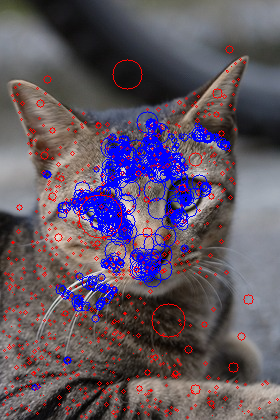

In [3]:
import cv2
import numpy as np
import time
from google.colab.patches import cv2_imshow
 
# 画像の読み込み
filename = "prof.jpg"
srcimg = cv2.imread(filename,1) # 1:color, 0:gray, -1:asis
gryimg = cv2.cvtColor(srcimg, cv2.COLOR_BGR2GRAY)
 
# Detector の作成
orb = cv2.ORB_create()
sift = cv2.xfeatures2d.SIFT_create()
 
# 特徴検出
t0 = time.time()
orbkps = orb.detect(gryimg)
t1 = time.time()
print("ORB:{} sec".format(t1-t0))
siftkps = sift.detect(gryimg)
t2 = time.time()
print("SIFT:{} sec".format(t2-t1))
 
# 特徴点の描画
for ip in orbkps:
  pt = (np.round(ip.pt[0]).astype(int),np.round(ip.pt[1]).astype(int))
  rd = np.round(ip.size*0.1).astype(int)
  cv2.circle(srcimg,pt,rd,(255,0,0),1,8,0)
for ip in siftkps:
  pt = (np.round(ip.pt[0]).astype(int),np.round(ip.pt[1]).astype(int))
  rd = np.round(ip.size*0.25).astype(int)
  cv2.circle(srcimg,pt,rd,(0,0,255),1,8,0)
 
cv2_imshow(srcimg)
